In [14]:
import geopandas as gpd
import rasterio
from rasterio.plot import show
from rasterio.plot import show_hist
import rasterstats
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
# Read the sub-districts of Thailand shapefile 
subdistricts = gpd.read_file(r'D:\Thai\GIS Data\Humdata_Thailand administrative levels 0-3 boundaries\tha_adm_rtsd_itos_20190221_SHP_PART_2\tha_admbnda_adm3_rtsd_20190221.shp')

In [16]:
# Read the NO2 raster of before pandemic
no2 = rasterio.open(r'D:\Projects\Ajarn Noppol\005_COVID Project\COVID Thailand\Abstract\Version_2\Before_Thai_V2_Clip.tif', mode = 'r')


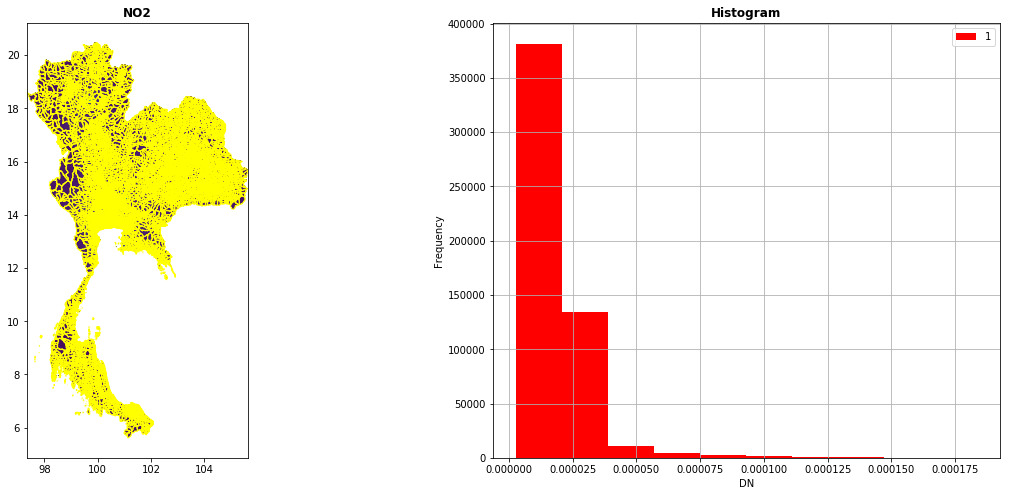

In [17]:
# Plotting the raster and the sub-districts of Thailand shapefile together 
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,8))
show(no2, ax = ax1, title = 'NO2')
subdistricts.plot(ax = ax1, facecolor = 'None', edgecolor = 'yellow')
show_hist(no2, title = 'Histogram', ax = ax2)
plt.show()

In [18]:
# Assign raster values to a numpy nd array
nitrogendioxide_array = no2.read(1)

affine = no2.transform

In [19]:
# Calculating the zonal statistics 
avg_no2  = rasterstats.zonal_stats(subdistricts, nitrogendioxide_array, affine = affine,
                                      stats = ['mean'], 
                                      geojson_out = True)

C:\ProgramData\Anaconda3\lib\site-packages\rasterstats\io.py:300: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


In [20]:
# Extracting the average NO2 data from the list
avg_nitrogendioxide = []
i = 0

while i < len(avg_no2):
    avg_nitrogendioxide.append(avg_no2[i]['properties'])
    i = i + 1

In [21]:
# Transfering the infromation from the list to a pandas DataFrame

avg_no2_thai_subdis_before = pd.DataFrame(avg_nitrogendioxide)
print(avg_no2_thai_subdis_before)

       ADM0_EN ADM0_PCODE                      ADM0_TH      ADM1_EN  \
0     Thailand         TH  à¸à¸£à¸°à¹à¸à¸¨à¹à¸à¸¢         Loei   
1     Thailand         TH  à¸à¸£à¸°à¹à¸à¸¨à¹à¸à¸¢      Pattani   
2     Thailand         TH  à¸à¸£à¸°à¹à¸à¸¨à¹à¸à¸¢        Surin   
3     Thailand         TH  à¸à¸£à¸°à¹à¸à¸¨à¹à¸à¸¢         Yala   
4     Thailand         TH  à¸à¸£à¸°à¹à¸à¸¨à¹à¸à¸¢          Nan   
...        ...        ...                          ...          ...   
7420  Thailand         TH  à¸à¸£à¸°à¹à¸à¸¨à¹à¸à¸¢         Yala   
7421  Thailand         TH  à¸à¸£à¸°à¹à¸à¸¨à¹à¸à¸¢   Chiang Mai   
7422  Thailand         TH  à¸à¸£à¸°à¹à¸à¸¨à¹à¸à¸¢       Phayao   
7423  Thailand         TH  à¸à¸£à¸°à¹à¸à¸¨à¹à¸à¸¢   Chiang Mai   
7424  Thailand         TH  à¸à¸£à¸°à¹à¸à¸¨à¹à¸à¸¢  Suphan Buri   

     ADM1_PCODE                         ADM1_TH         ADM2_EN ADM2_PCODE  \
0          TH42                       à¹à¸¥à¸¢          Tha Li     T

In [115]:
avg_no2_thai_subdis_before.to_csv('Thai_MeanNO2_SubDis_Before.csv', encoding='utf-8')